# 🚀 Artificial Intelligence - 2025 | Week 5
*Unlock the Future with Intelligent Machines* 🤖✨

- **Author:** Teerapong Panboonyuen (also known as Kao Panboonyuen)
- **GitHub:** [kaopanboonyuen/SC310005_ArtificialIntelligence_2025s1](https://github.com/kaopanboonyuen/SC310005_ArtificialIntelligence_2025s1)

## 🔧 Recommender System in Colab: Step-by-Step Code + Explanation

We'll walk through:

1. **Content-Based Filtering (Item-based & User-based)**
2. **Collaborative Filtering**

   * User-User Similarity (Jaccard, Cosine)
   * Item-Item Similarity
3. **Matrix Factorization (SVD from scratch + Surprise library)**
4. (TODO) **Neural Networks for Recommender Systems**
5. (TODO) **Modern Models: Autoencoders + Transformer-style**

## 🔍 Step 1: Load & Explore Dataset (EDA)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSVs
users = pd.read_csv('https://github.com/kaopanboonyuen/SC310005_ArtificialIntelligence_2025s1/raw/main/dataset/{DATASET}.csv', encoding='latin-1')
books = pd.read_csv('https://github.com/kaopanboonyuen/SC310005_ArtificialIntelligence_2025s1/raw/main/dataset/{DATASET}.csv', encoding='latin-1')
ratings = pd.read_csv('https://github.com/kaopanboonyuen/SC310005_ArtificialIntelligence_2025s1/raw/main/dataset/{DATASET}.csv', encoding='latin-1')

# Preview
print("👤 Users:\n", users.head())
print("\n📘 Books:\n", books[['ISBN', 'Book-Title', 'Book-Author']].head())
print("\n⭐ Ratings:\n", ratings.head())

👤 Users:
    User-ID                        Location   Age
0       17       chesapeake, virginia, usa   NaN
1       42        appleton, wisconsin, usa  17.0
2       67  framingham, massachusetts, usa  43.0
3       88      fayetteville, georgia, usa   NaN
4      125          lansing, michigan, usa  49.0

📘 Books:
          ISBN                                         Book-Title  \
0  0399135782                             The Kitchen God's Wife   
1  0440234743                                      The Testament   
2  0452264464               Beloved (Plume Contemporary Fiction)   
3  0609804618  Our Dumb Century: The Onion Presents 100 Years...   
4  0971880107                                        Wild Animus   

     Book-Author  
0        Amy Tan  
1   John Grisham  
2  Toni Morrison  
3      The Onion  
4   Rich Shapero  

⭐ Ratings:
    User-ID        ISBN  Book-Rating
0    32440  0380018179            8
1    49144  8422641127            5
2   156424  3442453844            7
3    

## 🎯 Step 2: Fun EDA with Questions

We'll use **student-friendly questions** to guide EDA and visualization.

### ❓ Q1: How many users, books, and ratings do we have?


In [ ]:
print("📦 Number of Users:", #INSERT_YOUR_CODE_HERE)
print("📚 Number of Books:", #INSERT_YOUR_CODE_HERE)
print("📝 Number of Ratings:", #INSERT_YOUR_CODE_HERE)

📦 Number of Users: 10867
📚 Number of Books: 13935
📝 Number of Ratings: 20000


### ❓ Q2: What is the distribution of book ratings?

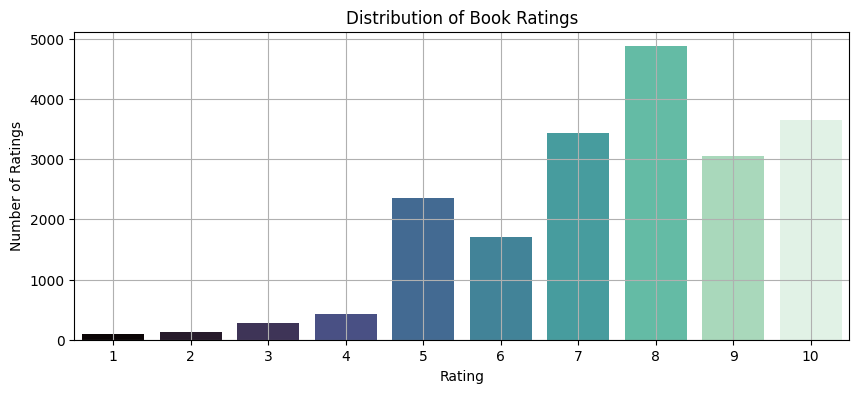

In [39]:
plt.figure(figsize=(10, 4))
sns.countplot(data=ratings, x='Book-Rating', hue='Book-Rating', palette='mako', legend=False)
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.grid(True)
plt.show()

### ❓ Q3: Which books are the most rated?

📘 Top 10 Most Rated Books:


,ISBN,Book-Title
4,0971880107,Wild Animus
9,0446310786,To Kill a Mockingbird
42,0671027360,Angels &amp; Demons
143,0316666343,The Lovely Bones: A Novel
178,0312195516,The Red Tent (Bestselling Backlist)
189,0156027321,Life of Pi
541,0440226430,Summer Sisters
618,067976402X,Snow Falling on Cedars
690,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...
704,0345342968,Fahrenheit 451


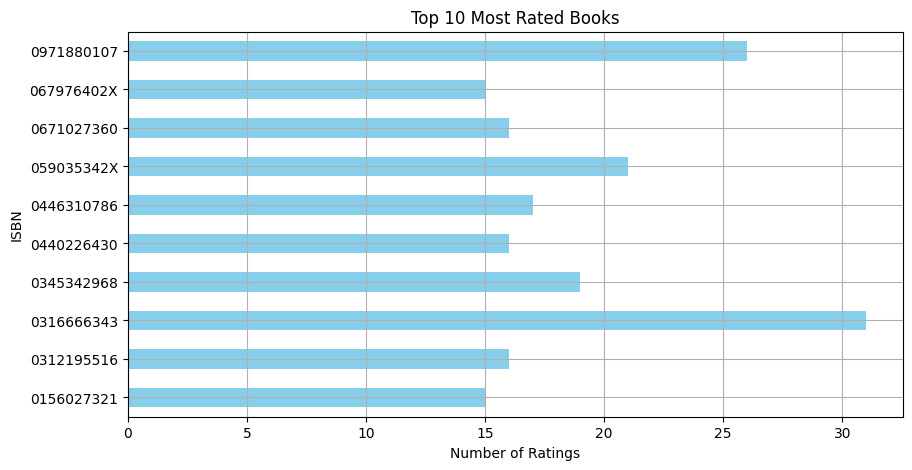

In [ ]:
top_books = #INSERT_YOUR_CODE_HERE

top_books_titles = books[books['ISBN'].isin(top_books)][['ISBN', 'Book-Title']]
print("📘 Top 10 Most Rated Books:")
display(top_books_titles)

ratings[ratings['ISBN'].isin(top_books)].groupby('ISBN').size().plot(kind='barh', figsize=(10,5), color='skyblue')
plt.title("Top 10 Most Rated Books")
plt.xlabel("Number of Ratings")
plt.ylabel("ISBN")
plt.grid(True)
plt.show()

### ❓ Q4: Where are our users from? What’s the most common country?

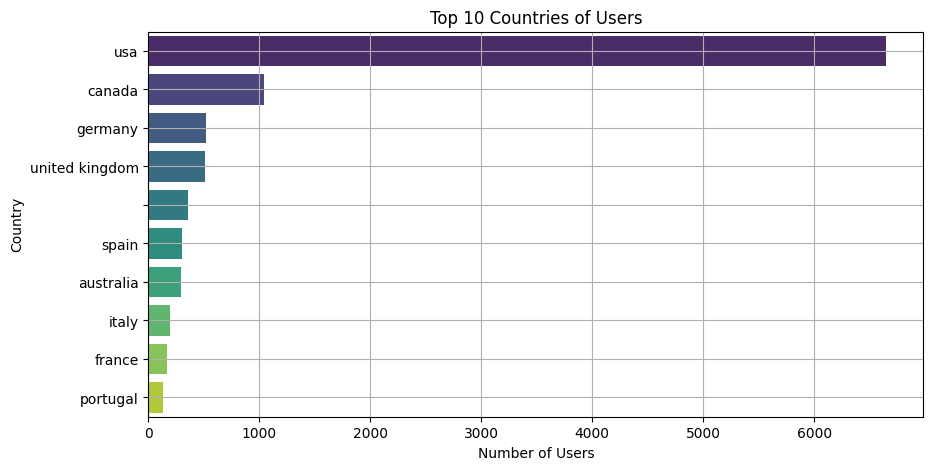

In [41]:
# Extract country from location (last word after comma)
users['Country'] = users['Location'].str.split(',').str[-1].str.strip().str.lower()

top_countries = users['Country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index,
            hue=top_countries.index, palette='viridis', legend=False)
plt.title("Top 10 Countries of Users")
plt.xlabel("Number of Users")
plt.ylabel("Country")
plt.grid(True)
plt.show()

### ❓ Q5: What’s the age distribution of users? Any suspicious values?

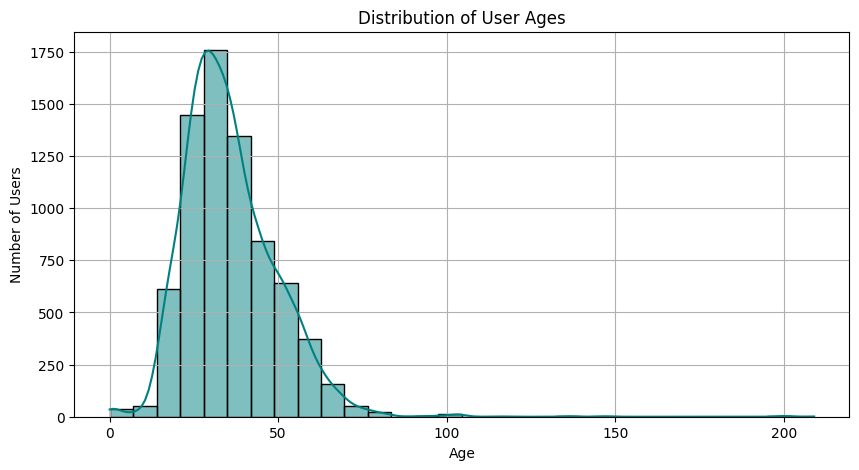

📌 Valid Users after filtering: 7307


In [42]:
plt.figure(figsize=(10,5))
sns.histplot(users['Age'].dropna(), bins=30, kde=True, color='teal')
plt.title("Distribution of User Ages")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.grid(True)
plt.show()

# Let's filter valid ages (e.g., 5–90)
valid_users = users[(users['Age'] >= 5) & (users['Age'] <= 90)]
print("📌 Valid Users after filtering:", valid_users.shape[0])

### ❓ Q6: Which authors have the most books in the dataset?

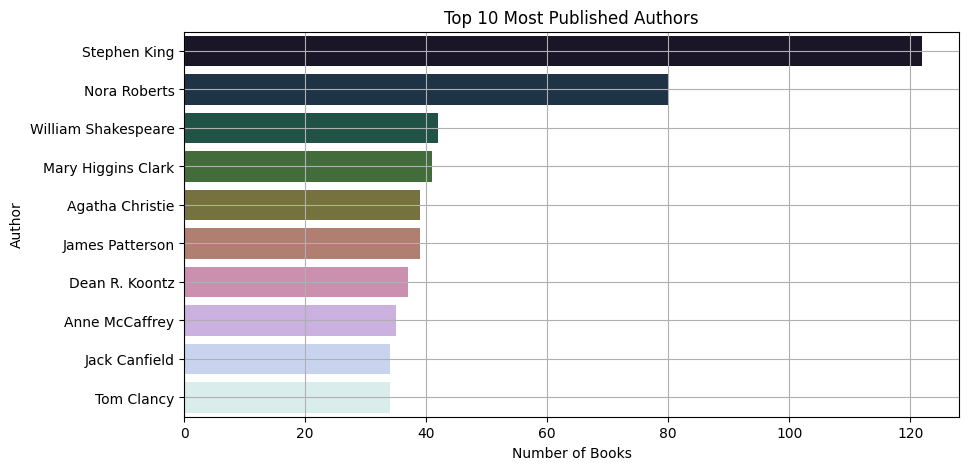

In [ ]:
top_authors = #INSERT_YOUR_CODE_HERE

plt.figure(figsize=(10,5))
sns.barplot(x=top_authors.values, y=top_authors.index,
            hue=top_authors.index, palette='cubehelix', legend=False)
plt.title("Top 10 Most Published Authors")
plt.xlabel("Number of Books")
plt.ylabel("Author")
plt.grid(True)
plt.show()

### ❓ Q7: What are the oldest and newest books?

In [44]:
# Convert to numeric, forcing invalid strings to NaN
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

# Filter valid years
books_filtered = books[(books['Year-Of-Publication'] >= 1900) & (books['Year-Of-Publication'] <= 2025)]

# Sort to get oldest and newest books
oldest_books = books_filtered.sort_values('Year-Of-Publication').head(5)
newest_books = books_filtered.sort_values('Year-Of-Publication', ascending=False).head(5)

# Display results
print("📜 Oldest Books:")
display(oldest_books[['Book-Title', 'Book-Author', 'Year-Of-Publication']])

print("\n🚀 Newest Books:")
display(newest_books[['Book-Title', 'Book-Author', 'Year-Of-Publication']])

📜 Oldest Books:


,Book-Title,Book-Author,Year-Of-Publication
4210,Liasons Dangeruses,Pierre Ambroise Francois Choderl Laclos,1920
8628,Matilda,Roald Dahl,1920
6965,Farewell to Arms,Ernest Hemingway,1929
2756,The Secret of the Old Clock (Nancy Drew Myster...,Carolyn Keene,1930
11885,East Wind: West Wind,Pearl S. Buck,1930



🚀 Newest Books:


,Book-Title,Book-Author,Year-Of-Publication
13388,"Monkey (An Evergreen Book, E-112)",Cheng-En Wu,2011
5844,The Five Love Languages: Five Love Languages,Gary Chapman,2005
13100,In My Brother's Shadow,Uwe Timm,2005
7029,A Woman of No Importance (Penguin Popular Clas...,Oscar Wilde,2005
4143,Code Name: Nanny,CHRISTINA SKYE,2004


### ❓ Q8: Who are the most active users?

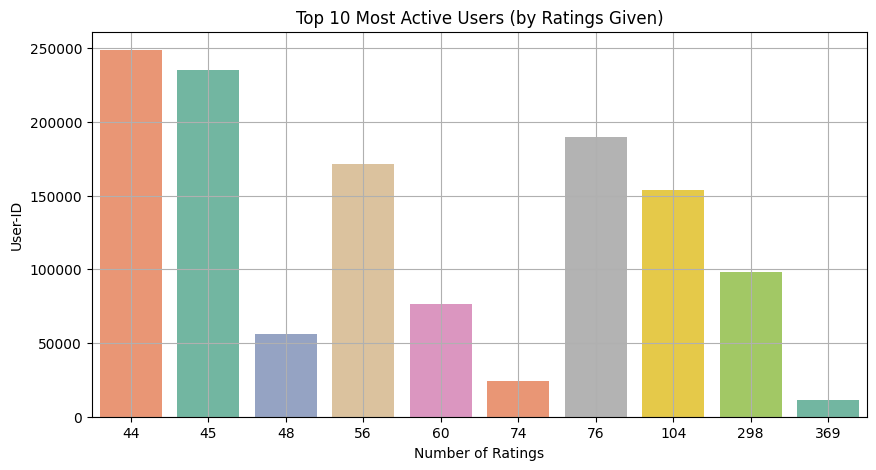

In [ ]:
top_users = #INSERT_YOUR_CODE_HERE

plt.figure(figsize=(10,5))
sns.barplot(x=top_users.values, y=top_users.index,
            hue=top_users.index, palette='Set2', legend=False)
plt.title("Top 10 Most Active Users (by Ratings Given)")
plt.xlabel("Number of Ratings")
plt.ylabel("User-ID")
plt.grid(True)
plt.show()


## 🧠 STEP 3: Content-Based Recommender System

> Recommends books that are **similar in content**: title, author, etc.
> No need to rely on other users!

### ❓ Q1: How can we measure how “similar” two books are?

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine title and author into a single string
books['combined'] = books['Book-Title'].fillna('') + ' ' + books['Book-Author'].fillna('')

# TF-IDF (ignore common English words)
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books['combined'])

# Cosine similarity matrix between all books
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

### ❓ Q2: Let’s write a function to recommend similar books (Content-Based)

In [47]:
def find_titles_with_keyword(keyword):
    matches = books[books['Book-Title'].str.lower().str.contains(keyword.lower())]
    return matches[['Book-Title']].drop_duplicates().head(10)

find_titles_with_keyword("love")

,Book-Title
2,Beloved (Plume Contemporary Fiction)
44,"If Love Were Oil, I'd Be About a Quart Low"
45,The Girl Who Loved Tom Gordon
82,Only Love (Magical Love)
143,The Lovely Bones: A Novel
157,The Lovely Bones
211,MoveOn's 50 Ways to Love Your Country: How to ...
342,The Princess Bride: S Morgenstern's Classic Ta...
400,"Forever... : A Novel of Good and Evil, Love an..."
500,A Natural History of Love


In [48]:
import difflib

def find_closest_title(input_title, titles):
    return difflib.get_close_matches(input_title.lower(), titles.str.lower(), n=1)

closest = find_closest_title("Love", books['Book-Title'])
print(closest)

['beloved']


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# 1. Clean duplicates
books = books.drop_duplicates(subset='Book-Title').reset_index(drop=True)

# 2. Vectorize book titles (or description if you have it)
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books['Book-Title'])  # or books['Book-Description'] if available

# 3. Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)

# 4. Create title to index mapping
title_to_index = pd.Series(books.index, index=books['Book-Title'].str.lower())

In [50]:
import difflib

def recommend_books_content(title, top_k=10):
    title = title.lower()

    if title not in title_to_index:
        matches = difflib.get_close_matches(title, title_to_index.index, n=1)
        if not matches:
            print("❌ Book not found.")
            print("🔍 Try one of these:")
            print(find_titles_with_keyword(title))
            return
        title = matches[0]
        print(f"🔁 Closest match used: '{title}'")

    idx = title_to_index[title]
    if isinstance(idx, pd.Series):
        idx = idx.iloc[0]  # Just in case of duplicates

    sim_scores = list(enumerate(cosine_sim[idx]))  # cosine_sim must be a 2D NumPy array
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_k+1]
    book_indices = [i[0] for i in sim_scores]

    return books[['Book-Title', 'Book-Author']].iloc[book_indices]

In [51]:
recommend_books_content("love")

🔁 Closest match used: 'beloved'


,Book-Title,Book-Author
6734,My Beloved,Karen Ranney
7797,Beloved Knight,Mallory Burgess
9768,Beloved African,Jill Baker
12928,Beloved Embrace,Cassie Edwards
3327,Beloved : Gift Edition,TONI MORRISON
2,Beloved (Plume Contemporary Fiction),Toni Morrison
6974,The Best of James Herriot: Favorite Memories o...,James Herriot
0,The Kitchen God's Wife,Amy Tan
1,The Testament,John Grisham
3,Our Dumb Century: The Onion Presents 100 Years...,The Onion


## 👥 STEP 4: Collaborative Filtering (User-Based & Item-Based)

> Recommends books based on **what similar users like** or **similar items**.


### 🔹 **1. Prepare the user-item rating matrix**

Only include ratings where `Book-Rating > 0` to focus on meaningful preferences.

In [ ]:
# Filter out ratings with score 0
ratings_filtered = #INSERT_YOUR_CODE_HERE

# Create user-item matrix (users as rows, books as columns)
user_item_matrix = ratings_filtered.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)

### 🔹 **2. User-Based Collaborative Filtering**

#### 🧠 Similarity between users

In [53]:
# from sklearn.metrics.pairwise import cosine_similarity

# # Compute user-user similarity
# user_similarity = cosine_similarity(user_item_matrix)
# user_sim_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

In [54]:
# Step 1: Take the first 200 users (rows)
user_item_small = user_item_matrix.iloc[:200, :]

from sklearn.metrics.pairwise import cosine_similarity

# Step 2: Compute similarity only on the 200 users
user_similarity = cosine_similarity(user_item_small)

# Step 3: Wrap in a DataFrame
user_sim_df = pd.DataFrame(user_similarity, index=user_item_small.index, columns=user_item_small.index)

#### 📚 Recommend books based on similar users

In [55]:
def recommend_user_collab(user_id, top_k=5):
    if user_id not in user_item_matrix.index:
        print("❌ User not found.")
        return

    # Find top similar users (excluding the user themself)
    similar_users = user_sim_df[user_id].sort_values(ascending=False)[1:top_k+1]

    # Weighted average of ratings from similar users
    weighted_ratings = user_item_matrix.loc[similar_users.index].T.dot(similar_users)
    weighted_ratings = weighted_ratings / similar_users.sum()

    # Exclude books already rated by this user
    already_rated = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index
    recommendations = weighted_ratings.drop(already_rated).sort_values(ascending=False).head(top_k)

    return books[books['ISBN'].isin(recommendations.index)][['Book-Title', 'Book-Author']]

In [56]:
sample_users = list(user_item_matrix.index[:10])  # grab a few valid IDs
print("Sample user IDs:", sample_users)

recommend_user_collab(user_id=sample_users[0])

Sample user IDs: [17, 42, 67, 88, 125, 182, 183, 254, 280, 300]


,Book-Title,Book-Author
12879,The Clue in the Crumbling Wall,Carolyn Keene


### 🔹 **3. Item-Based Collaborative Filtering**

#### 🧠 Similarity between books

In [57]:
# # Compute item-item similarity
# item_similarity = cosine_similarity(user_item_matrix.T)
# item_sim_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

In [58]:
# Select only the first 200 books (columns)
user_item_small = user_item_matrix.iloc[:, :200]
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity on the reduced matrix
item_similarity = cosine_similarity(user_item_small.T)

# Create a DataFrame for the similarity matrix
item_sim_df = pd.DataFrame(item_similarity, index=user_item_small.columns, columns=user_item_small.columns)

#### 📚 Recommend similar books based on ISBN

In [59]:
def recommend_item_collab(isbn, top_k=5):
    if isbn not in item_sim_df.index:
        print("❌ ISBN not found.")
        return

    sim_scores = item_sim_df[isbn].sort_values(ascending=False)[1:top_k+1]
    return books[books['ISBN'].isin(sim_scores.index)][['Book-Title', 'Book-Author']]

In [60]:
sample_isbns = list(user_item_matrix.columns[:10])
print("Sample ISBNs:", sample_isbns)

recommend_item_collab(isbn=sample_isbns[0])

Sample ISBNs: ['0.15.602732.1', '000000000', '0000000051', '0001047973', '000160418X', '0001700138', '0002243865', '0002246252', '0002247267', '0002253151']


,Book-Title,Book-Author
12879,The Clue in the Crumbling Wall,Carolyn Keene


### ✅ Summary

| Method            | Uses      | Recommends based on...                  |
| ----------------- | --------- | --------------------------------------- |
| **User-Based CF** | `User-ID` | Other users who rate similarly          |
| **Item-Based CF** | `ISBN`    | Books that are rated similarly by users |

### ❓ BONUS: Can we calculate Jaccard Similarity from scratch?

🧠 Yes! Let’s write a **Jaccard similarity** function from scratch between two users.

In [61]:
import numpy as np
def jaccard(u1, u2):
    set1 = set(np.where(u1 > 0)[0])
    set2 = set(np.where(u2 > 0)[0])
    if not set1 or not set2:
        return 0
    return len(set1 & set2) / len(set1 | set2)

user1 = user_item_matrix.loc[67]
user2 = user_item_matrix.loc[88]

print("🔍 Jaccard Similarity (User 1 vs 2):", jaccard(user1, user2))

🔍 Jaccard Similarity (User 1 vs 2): 0.0


## 🏁 Summary

You’ve just built:

✅ Content-Based Recommender
✅ User-User Collaborative Filtering
✅ Item-Item Collaborative Filtering
✅ Jaccard Similarity from Scratch

## 🧠 Method: Matrix Factorization (SVD)

Use SVD to learn **latent factors** from the ratings matrix.

### ✨ Q: Can we predict ratings for all unseen books?

In [62]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.sparse.linalg import svds
import numpy as np

In [63]:
ratings_filtered = ratings[ratings['Book-Rating'] > 0]
ratings_filtered = ratings_filtered.head(1000)

In [64]:
# Create user-item matrix
user_item_matrix = ratings_filtered.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)

# Convert to numpy array
R = user_item_matrix.values
user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

# Perform SVD
U, sigma, Vt = svds(R_demeaned, k=50)  # k = number of latent features
sigma = np.diag(sigma)

# Reconstruct prediction matrix
predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
pred_df = pd.DataFrame(predicted_ratings, columns=user_item_matrix.columns, index=user_item_matrix.index)

In [65]:
pred_df

ISBN,000647425X,0006551971,0006552390,0007103352,0007106572,0020199708,0020778201,0030617316,0030632366,0060014253,...,9724125866,9726081378,972695374,9728413300,978187834607,9782890444225,999482984X,B00005RID3,B0000X8HIE,D446610038
User-ID,,,,,,,,,,,,,,,,,,,,,
638,0.011975,0.012252,0.011975,-0.003769,0.012748,0.017558,0.013514,0.011829,0.014250,0.012252,...,0.012452,0.014250,0.012252,0.012252,0.011975,0.012252,-0.010362,0.013953,0.013557,0.012748
776,0.009048,0.009162,0.009048,0.000378,0.009358,0.010978,0.009633,0.008987,0.009918,0.009162,...,0.009242,0.009918,0.009162,0.009162,0.009048,0.009162,0.002387,0.009802,0.009647,0.009358
1653,0.007832,0.007917,0.007832,0.001084,0.008061,0.009216,0.008259,0.007787,0.008468,0.007917,...,0.007976,0.008468,0.007917,0.007917,0.007832,0.007917,0.003239,0.008383,0.008269,0.008061
1733,0.009048,0.009162,0.009048,0.000378,0.009358,0.010978,0.009633,0.008987,0.009918,0.009162,...,0.009242,0.009918,0.009162,0.009162,0.009048,0.009162,0.002387,0.009802,0.009647,0.009358
1830,0.006666,0.006730,0.006666,0.001384,0.006839,0.007694,0.006987,0.006631,0.007144,0.006730,...,0.006775,0.007144,0.006730,0.006730,0.006666,0.006730,0.003345,0.007080,0.006994,0.006839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276688,0.010365,0.010528,0.010365,-0.001018,0.010813,0.013291,0.011226,0.010277,0.011643,0.010528,...,0.010644,0.011643,0.010528,0.010528,0.010365,0.010528,-0.000344,0.011473,0.011247,0.010813
276786,0.006666,0.006730,0.006666,0.001384,0.006839,0.007694,0.006987,0.006631,0.007144,0.006730,...,0.006775,0.007144,0.006730,0.006730,0.006666,0.006730,0.003345,0.007080,0.006994,0.006839
277929,0.009048,0.009162,0.009048,0.000378,0.009358,0.010978,0.009633,0.008987,0.009918,0.009162,...,0.009242,0.009918,0.009162,0.009162,0.009048,0.009162,0.002387,0.009802,0.009647,0.009358


### 🎓 Evaluation: RMSE

Use a **train-test split** to calculate the RMSE of the predictions.

In [66]:
from sklearn.model_selection import train_test_split

# Split ratings into train/test
train, test = train_test_split(ratings_filtered, test_size=0.1, random_state=42)

# Build train matrix
train_matrix = train.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)
R_train = train_matrix.values
mean_train = np.mean(R_train, axis=1)
R_demeaned_train = R_train - mean_train.reshape(-1, 1)

# SVD on train set
U, sigma, Vt = svds(R_demeaned_train, k=20)
sigma = np.diag(sigma)
predicted_train = np.dot(np.dot(U, sigma), Vt) + mean_train.reshape(-1, 1)
pred_df_train = pd.DataFrame(predicted_train, columns=train_matrix.columns, index=train_matrix.index)

# Evaluate on test set
def get_rmse(pred_df, test_df):
    preds = []
    actuals = []
    for _, row in test_df.iterrows():
        user = row['User-ID']
        isbn = row['ISBN']
        actual = row['Book-Rating']
        try:
            pred = pred_df.loc[user, isbn]
            preds.append(pred)
            actuals.append(actual)
        except:
            continue
    return sqrt(mean_squared_error(actuals, preds))

rmse = get_rmse(pred_df_train, test)
print(f'📉 RMSE: {rmse:.4f}')

📉 RMSE: 6.9917


# 🧠 Week 5 AI Homework Summary

📌 **Task**: Build a recommender system using **Collaborative Filtering** for an online retail dataset. Students must discover **at least 5 insights** using code (inspired by real questions) before building the model.

✅ **Steps**:
1. Load and clean the Online Retail dataset.
2. Use **Collaborative Filtering**
3. Before modeling, answer **5 customer/product insights** using real-world-style questions and visualizations.
4. Evaluate the model using **RMSE**
5. 🏅 Bonus: Try creating **item-based CF** or a **basic hybrid model**.

📄 **Example Questions for Insight Exploration**:
Each must be **answered with code + visualization or statistics**.

📄 **Full details**: See `AI-Homework-Assignment-Week-5.pdf`

📅 **Deadline**: To be confirmed during class